<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST dataset:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


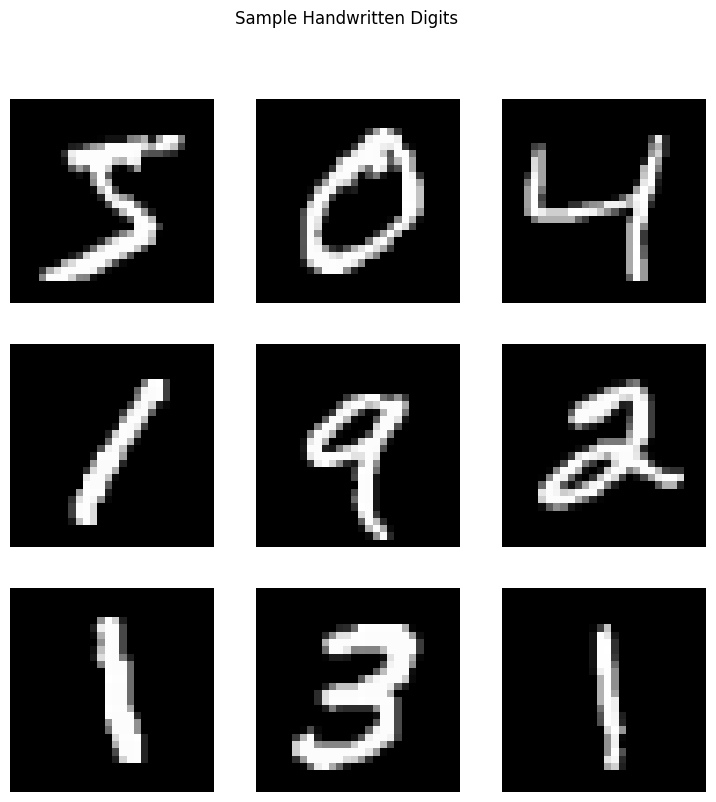

In [3]:
# Plot 9 sample images
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Handwritten Digits')
plt.show()

***
Preprocessing the data
***

In [4]:
# Normalising the pixel values to the range [0, 1]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshaping the input data to fit the model:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

***
Defining the model architecture
***

In [6]:
# Creating a sequential model
model = Sequential()


# Adding the necessary layers:
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


***
Model Compilation and Training
***

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=10, batch_size=32, validation_data=(X_test, tf.keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2345 - accuracy: 0.9314 - val_loss: 0.1117 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1013 - accuracy: 0.9694 - val_loss: 0.1103 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.1062 - val_accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.0746 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0784 - val_accurac

***
Model Evaluation
***

In [8]:
loss, accuracy = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9797
Test loss: 0.0855
Test accuracy: 0.9797
